In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
def GetTridiagMatrix(x, N):
	U = lambda x: x ** 2 / 2
	h = x[1] - x[0]
	a = np.array([-1. / (2 * h ** 2)] * N)
	c = np.copy(a)
	a[0] = 0
	c[N - 1] = 0
	b = 1. / h ** 2 + U(x)
	return a, b, c


def SolveTridiagMatrix(a, b, c, d, N):
	y = np.array([0.] * N)

	for j in range(1, N):
		xi = a[j] / b[j - 1]
		a[j] = 0
		b[j] -= xi * c[j - 1]
		d[j] -= xi * d[j - 1]

	y[N - 1] = d[N - 1] / b[N - 1]

	for i in range(N - 2, -1, -1):
		y[i] = 1 / b[i] * (d[i] - c[i] * y[i + 1])

	return y

In [112]:
def InverseIterations(psi_initial, x, N, levels, iterations=10):
	energies = []
	psi_list = []
	a, b, c = GetTridiagMatrix(x, N)
	for level in range(0, levels):
		current_psi = psi_initial.copy()
		for k in range(0, iterations):
			previous_psi = current_psi
			current_psi = SolveTridiagMatrix(np.copy(a), np.copy(b), np.copy(c), np.copy(current_psi), N)
			# Gram-Schmidt orthonormalizing process
			for psi in psi_list:
				current_psi -= psi * (np.inner(current_psi, psi)) / np.linalg.norm(psi)
		energyLevel = np.linalg.norm(previous_psi) / np.linalg.norm(current_psi)
		energies.append(energyLevel)
		current_psi /= np.linalg.norm(current_psi)
		psi_list.append(current_psi)

	return energies, psi_list

E0: 0.49998747465196053
E1: 1.5037884119402531
E2: 2.4950525009864974


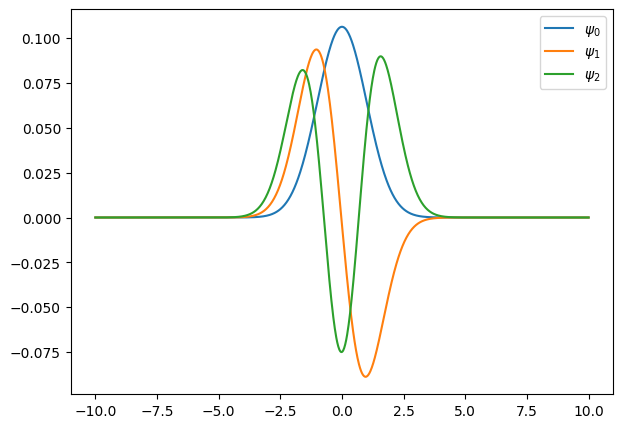

In [113]:
N = 1000
a = -10
b = 10
levels = 3
x = np.linspace(a, b, N)
psi_initial = np.random.RandomState(2).random_sample(x.shape)

E, psi = InverseIterations(psi_initial, x, N, levels)

plt.figure(figsize=(7, 5), dpi=100)

for i in range(0, levels):
	print(f'E{i}: {E[i]}')
	plt.plot(x, psi[i], label=f'$\psi_{i}$')
plt.legend()
plt.show()